In [49]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

news = fetch_20newsgroups(subset='all') # subset='all' means we want all the data ( train + test)
print(f" The news dataset has {len(news.data)} samples")
print(f" Column names are {list(news.keys())}")
print(f" The target names are {set(news.target_names)}")



 The news dataset has 18846 samples
 Column names are ['data', 'filenames', 'target_names', 'target', 'DESCR']
 The target names are {'sci.space', 'rec.motorcycles', 'talk.politics.mideast', 'sci.crypt', 'rec.sport.baseball', 'sci.electronics', 'talk.religion.misc', 'comp.graphics', 'soc.religion.christian', 'alt.atheism', 'comp.windows.x', 'rec.autos', 'comp.os.ms-windows.misc', 'talk.politics.misc', 'talk.politics.guns', 'sci.med', 'rec.sport.hockey', 'comp.sys.ibm.pc.hardware', 'misc.forsale', 'comp.sys.mac.hardware'}


# Learnings from the Exploration

- Filenames give us the category_names of each article ( Potential feature)
- There are 18846 rows of data
- the data column has uncleaned text data which required frthur processing to be converted to a useable state

## Data
- Consist of 3 useable columns data, target_names, target
- target_names provides us with a unique list of topic names in the following format ```main_category.sub_category.topic```
- Note: the topic part in the target is sometime missing or not available 
- We can try to classify the documents into main_categories and maybe then narrow them down with sub and topics. 

## Potential tasks
- Text classification and Text Clustering 
Hypothesis : Based on an article's words or content can we place them into a group / topic

In [50]:
# exporing filenames and DESCR for potential use
print(f" The filenames are {news.filenames}")
print(f" The DESCR is {news.DESCR}")

 The filenames are ['/home/codespace/scikit_learn_data/20news_home/20news-bydate-test/rec.sport.hockey/54367'
 '/home/codespace/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.ibm.pc.hardware/60215'
 '/home/codespace/scikit_learn_data/20news_home/20news-bydate-train/talk.politics.mideast/76120'
 ...
 '/home/codespace/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.ibm.pc.hardware/60695'
 '/home/codespace/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38319'
 '/home/codespace/scikit_learn_data/20news_home/20news-bydate-test/rec.autos/103195']
 The DESCR is .. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

Thi

In [51]:
# print descr fully

print(news.DESCR)
# save the description to a file
with open("news.txt", "w") as f:
    f.write(news.DESCR)


.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [52]:
# exploring target names
target_names = list(set(news.target_names))
main_categories = [x.split(".")[0] for x in target_names]
sub_categories = [x.split(".")[1] for x in target_names]
# while creating topics I discovered that some of the target names have only 2 parts
topics = [x.split(".")[2] for x in target_names if len(x.split(".")) > 2]
unique_categories = set(main_categories)
unique_sub_categories = set(sub_categories)
unique_topics = set(topics)
print(f" The main categories are {unique_categories}")
print(f" The sub categories are {unique_sub_categories}")
print(f" The topics are {unique_topics}")


 The main categories are {'alt', 'soc', 'talk', 'misc', 'comp', 'sci', 'rec'}
 The sub categories are {'sport', 'forsale', 'windows', 'space', 'electronics', 'med', 'graphics', 'os', 'crypt', 'religion', 'politics', 'sys', 'autos', 'motorcycles', 'atheism'}
 The topics are {'baseball', 'x', 'misc', 'guns', 'ibm', 'mac', 'ms-windows', 'hockey', 'christian', 'mideast'}


In [53]:
print(f" The number of aritcles are {len(news.data)}")
print(f" The number of main categories are {len(unique_categories)}")
print(f" The number of sub categories are {len(unique_sub_categories)}")
print(f" The number of topics are {len(unique_topics)}")
print(f" The number of unique topics are {len(target_names)}")

 The number of aritcles are 18846
 The number of main categories are 7
 The number of sub categories are 15
 The number of topics are 10
 The number of unique topics are 20


In [54]:
# creating a dataframe
prefix = "/home/codespace/scikit_learn_data/20news_home/"
df = pd.DataFrame({'text': news.data, 'category': news.target, 'filename': news.filenames})
# removing the prefix from the filename
df['filename'] = df['filename'].apply(lambda x: x.replace(prefix, "").split("/")[1])
df.head()
# filter rows with category 10
df[df['category'] == 10].head()

,text,category,filename
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10,rec.sport.hockey
7,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,rec.sport.hockey
8,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,rec.sport.hockey
24,From: cs902043@ariel.yorku.ca (SHAWN LUDDINGTO...,10,rec.sport.hockey
44,From: gritter@cs.purdue.edu (Carl Gritter)\nSu...,10,rec.sport.hockey


In [55]:
# rename filename column to category_named
df.rename(columns={'filename': 'label'}, inplace=True)

In [56]:
# describe the dataframe
df.describe()

,category
count,18846.000000
mean,9.293166
std,5.562798
min,0.000000
25%,5.000000
50%,9.000000
75%,14.000000
max,19.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      18846 non-null  object
 1   category  18846 non-null  int64 
 2   label     18846 non-null  object
dtypes: int64(1), object(2)
memory usage: 441.8+ KB


## Class Distribution

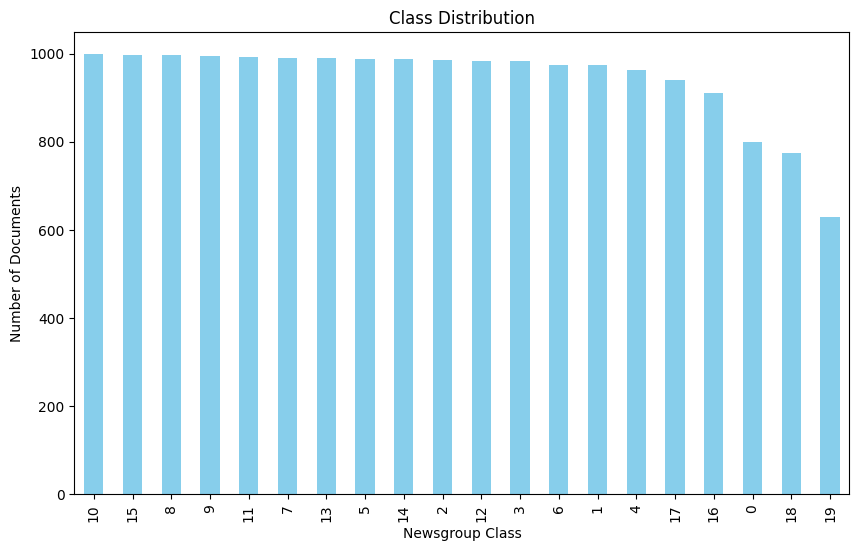

In [58]:
class_distribution = df['category'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Newsgroup Class')
plt.ylabel('Number of Documents')
plt.show()


Text(0.5, 1.0, 'News groups messages distribution')

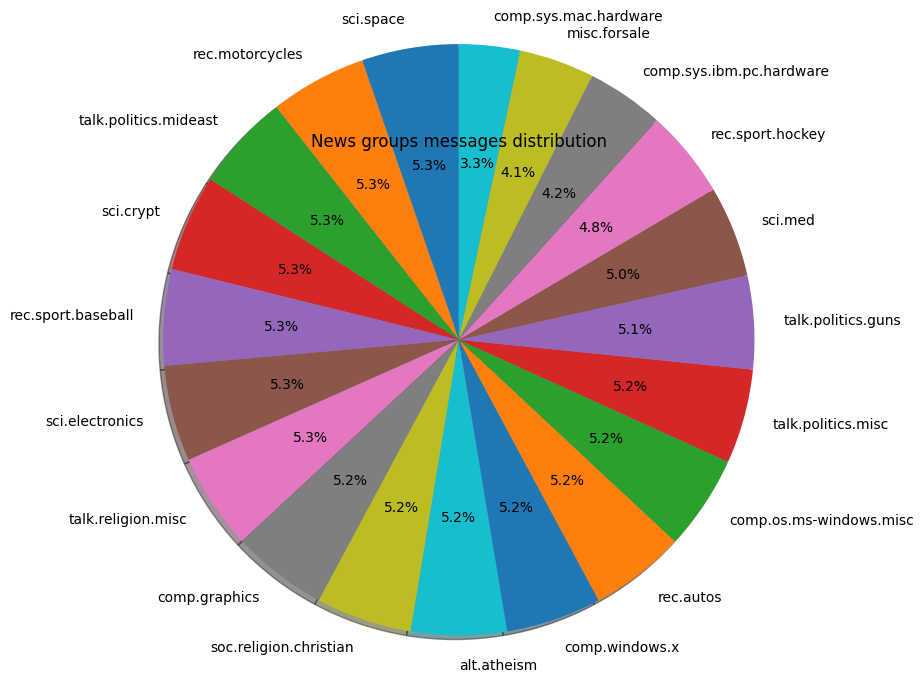

In [65]:
# class distribution on pie chart

slices = []

for key, value in class_distribution.items():
    slices.append(value)

labels = list(set(news.target_names))
   
fig , ax = plt.subplots()

# ax.pie(slices, labels = labels , autopct = '%1.1f%%', shadow = True, startangle = 90)
# bigger pie to make the autopct visible
ax.pie(slices, labels = labels , autopct = '%1.1f%%', shadow = True, startangle = 90, radius = 2)


ax.set_title("News groups messages distribution")

 

count     18846.000000
mean       1902.525894
std        3984.970264
min         115.000000
25%         751.000000
50%        1175.000000
75%        1874.750000
max      160616.000000
Name: text_length, dtype: float64


<Figure size 1000x600 with 0 Axes>

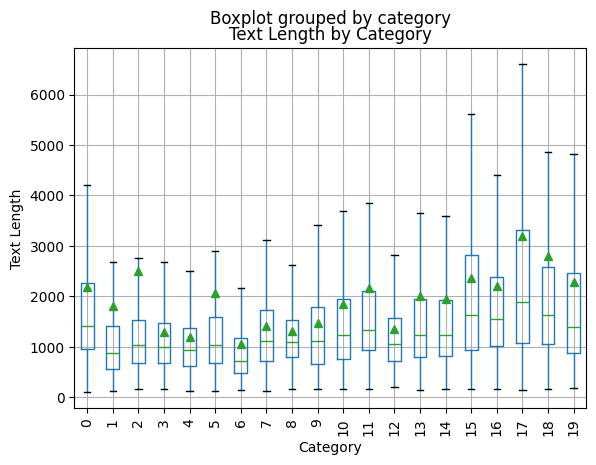

In [60]:
# Calculate the length of each document
df['text_length'] = df['text'].apply(len)

# Display statistics about text length
print(df['text_length'].describe())

# Plot a boxplot of text length for each category
plt.figure(figsize=(10, 6))
df.boxplot(column='text_length', by='category', showfliers=False, showmeans=True)
plt.title('Text Length by Category')
plt.ylabel('Text Length')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.show()


In [61]:
# look for duplicates
df[df.duplicated(['text'], keep=False)].sort_values('text').head(10)
print(f" The number of duplicates are {len(df[df.duplicated(['text'], keep=False)])}")
# drop duplicates
df.drop_duplicates(['text'], inplace=True)

# look for null values
df.isnull().sum()



 The number of duplicates are 0


text           0
category       0
label          0
text_length    0
dtype: int64